# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [1]:
# Start your codes here!
!pip install --upgrade -q gspread
!pip install gspread oauth2client
# gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread 
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe 


In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
link = 'gdrive/My Drive/chocolate.csv'
choco_bar1= pd.read_csv(link)
choco_bar=choco_bar1

In [0]:
choco_bar.head(15)


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [0]:
choco_bar.sample(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1235,Original Beans (Felchlin),"Alto Beni, Wild Harvest, Itenez R., 60hr c.",341,2009,68%,Switzerland,3.25,,Bolivia
591,Duffy's,"Corazon del Ecuador, Calceta beans",516,2010,72%,U.K.,3.75,,Ecuador
1218,Olivia,Carribean,688,2011,76%,Canada,2.75,,Carribean
1332,Pralus,Vanuatu,40,2006,75%,France,3.00,Trinitario,Vanuatu
62,Amano,Ocumare,175,2007,70%,U.S.A.,3.75,Criollo,Venezuela


In [0]:
choco_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
choco_bar.isnull().sum()

Company             0
Origin Bar Name     0
REF                 0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         1
dtype: int64

In [0]:
choco_bar.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [0]:
# choco_bar.columns= ['Company' ,'Origin Bar Name','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Bean Origin']

In [0]:
old_columns= choco_bar.columns
# old_columns
new_columns= ['Company' ,'Origin Bar Name','REF','Review Date','Cocoa Percent','Company Location','Rating','Bean Type','Bean Origin']
choco_bar.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)

In [11]:
choco_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company             1795 non-null object
Origin Bar Name     1795 non-null object
REF                 1795 non-null int64
Review Date         1795 non-null int64
Cocoa Percent       1795 non-null object
Company Location    1795 non-null object
Rating              1795 non-null float64
Bean Type           1794 non-null object
Bean Origin         1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
#describe not description 
choco_bar.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [0]:
# So the number of unique values must be equal the number of rows
choco_bar['Company'].nunique() == choco_bar['Company'].count()

False

In [0]:
choco_bar['Company'].nunique()

416

In [0]:
choco_bar['Company'].count()

1795

In [0]:
choco_bar['Company'].str.lower().sort_values().nunique()
# ten cong ty trung ten

416

In [0]:
# clean data
# check isnull
choco_bar.isnull().sum()

Company             0
Origin Bar Name     0
REF                 0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         0
dtype: int64

In [0]:
choco_bar[choco_bar['Bean Type'].isnull()]

,Company,Origin Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [28]:
choco_bar[choco_bar['Bean Origin'].isnull()]

,Company,Origin Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


<!--2 thuộc tính null không trùng nhau  -->

In [0]:
# Fill the blanks
choco_bar['Bean Type'].fillna(value=' ', inplace=True)


In [0]:
# Fill the blanks
# lay cot Origin Bar Name value for Bean Origin
choco_bar['Bean Origin']=choco_bar['Bean Origin'].fillna(choco_bar['Origin Bar Name'])


In [52]:
choco_bar['Bean Origin'].isnull().value_counts()


False    1795
Name: Bean Origin, dtype: int64

In [55]:
choco_bar.isnull().sum()

Company             0
Origin Bar Name     0
REF                 0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         0
dtype: int64

In [32]:
choco_bar[choco_bar['Bean Origin'].isnull()]

,Company,Origin Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin


In [31]:
choco_bar[choco_bar['Bean Origin']== choco_bar['Origin Bar Name']]

,Company,Origin Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
10,A. Morin,Panama,1011,2013,70%,France,2.75,,Panama
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar
12,A. Morin,Brazil,1011,2013,70%,France,3.25,,Brazil
16,A. Morin,Papua New Guinea,1015,2013,70%,France,3.25,,Papua New Guinea
21,A. Morin,Bolivia,797,2012,70%,France,3.50,,Bolivia
22,A. Morin,Peru,797,2012,63%,France,3.75,,Peru
36,Alain Ducasse,Vietnam,1215,2014,75%,France,2.75,Trinitario,Vietnam
37,Alain Ducasse,Madagascar,1215,2014,75%,France,3.00,Trinitario,Madagascar
51,Altus aka Cao Artisan,Bolivia,1129,2013,80%,U.S.A.,3.25,,Bolivia


In [0]:
choco_bar['Review Date'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2009, 2010, 2017, 2008, 2007,
       2006])

In [0]:
' '.join(["".join(x) for x in choco_bar.columns])

'Company\xa0(Maker-if known) Specific Bean Originor Bar Name REF ReviewDate CocoaPercent CompanyLocation Rating BeanType Broad BeanOrigin'

In [0]:
choco_bar['Rating'].unique()


array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

In [0]:
# Bean Origin
choco_bar['Bean Origin'].value_counts()

# Bean Origin co chua nhieu ki tu, thay the cac ki tu thanh ','

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
                                 73
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Costa Rica                       38
Vietnam                          38
Tanzania                         34
Ghana                            33
Trinidad                         33
Mexico                           30
Hawaii                           28
Guatemala                        28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Sao Tome                         10
Congo                       

In [79]:
choco_bar['Cocoa Percent'].unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [0]:
# Cocoa
choco_bar['Cocoa Percent']=choco_bar['Cocoa Percent'].str.replace('%','').astype(float)/10

In [81]:
choco_bar['Cocoa Percent']

0       6.3
1       7.0
2       7.0
3       7.0
4       7.0
5       7.0
6       7.0
7       7.0
8       7.0
9       7.0
10      7.0
11      7.0
12      7.0
13      7.0
14      7.0
15      7.0
16      7.0
17      7.0
18      7.0
19      7.0
20      6.3
21      7.0
22      6.3
23      7.0
24      7.0
25      6.0
26      8.0
27      8.8
28      7.2
29      5.5
       ... 
1765    7.0
1766    6.0
1767    7.0
1768    7.0
1769    8.5
1770    8.5
1771    7.0
1772    7.8
1773    7.8
1774    6.5
1775    6.8
1776    6.6
1777    7.2
1778    8.0
1779    7.2
1780    6.5
1781    7.0
1782    7.0
1783    6.2
1784    7.5
1785    7.5
1786    9.0
1787    7.0
1788    6.8
1789    5.8
1790    7.0
1791    6.5
1792    6.5
1793    6.2
1794    6.5
Name: Cocoa Percent, Length: 1795, dtype: float64

In [0]:
# Top 5 company choco had rated >= 4.
choco_bar.sort_values(by=['Rating'],ascending=False)['Company'][:5]

78                      Amedei
86                      Amedei
222                     Bonnat
76                      Amedei
1663    Tobago Estate (Pralus)
Name: Company(Maker-if known), dtype: object

In [0]:
# 5 nguyen lieu dc dung pho bien
choco_bar['Bean Type'].value_counts()[:5]

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: Bean Type, dtype: int64

<!-- Plot categorical data -->

In [0]:
# 

Plot categorical data

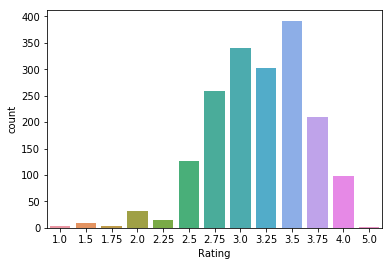

In [0]:
sns.countplot(x='Rating',data=choco_bar);
# Thanh choco được các chuyên gia đánh giá trên mức 2,5-4. nhiều, một số ít từ 1.-2.25 và rất ít đạt 5.

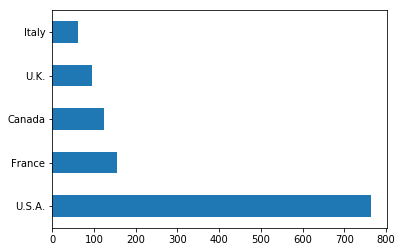

In [0]:
# company choco thuong toa lat o dau
choco_bar['Company Location'].value_counts()[:5].plot(kind='barh');

In [57]:
# Where does the best bean grown?
choco_bar5=choco_bar.groupby('Bean Origin').sum().sort_values(by='Rating',ascending=False)[:5]
choco_bar5


,REF,Review Date,Rating
Bean Origin,,,
Venezuela,185936,430449,694.50
Ecuador,180829,388270,605.00
Peru,199897,332198,517.75
Madagascar,140512,293742,476.00
Dominican Republic,145635,283764,452.50


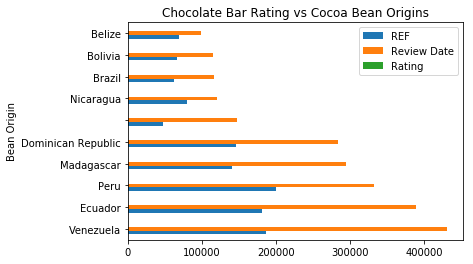

In [58]:
choco_bar5=choco_bar.groupby('Bean Origin').sum().sort_values(by='Rating',ascending=False)[:10].plot(kind='barh', title="Chocolate Bar Rating vs Cocoa Bean Origins");

In [97]:
# ti le cocoa chiem % nhieu
choco_bar.groupby('Cocoa Percent').sum().sort_values(by=['Cocoa Percent'],ascending=False)

,REF,Review Date,Rating
Cocoa Percent,,,
10.00,17037,40229,45.00
9.90,996,4018,5.25
9.10,834,6024,6.50
9.00,9411,16105,23.75
8.90,2358,4026,5.25
8.80,7360,16094,25.75
8.70,785,2011,3.25
8.60,1486,2015,3.25
8.50,33992,72423,107.50


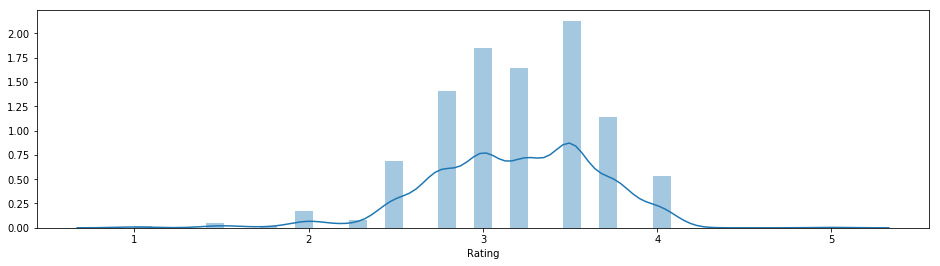

In [129]:
# displot 
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choco_bar['Rating'],ax=ax);

In [103]:


choco_bar3=choco_bar.groupby('Cocoa Percent').sum().sort_values(by=['Cocoa Percent'],ascending=False)
choco_bar3['Cocoa Percent']=choco_bar3.index
choco_bar3

,REF,Review Date,Rating,Cocoa Percent
Cocoa Percent,,,,
10.00,17037,40229,45.00,10.00
9.90,996,4018,5.25,9.90
9.10,834,6024,6.50,9.10
9.00,9411,16105,23.75,9.00
8.90,2358,4026,5.25,8.90
8.80,7360,16094,25.75,8.80
8.70,785,2011,3.25,8.70
8.60,1486,2015,3.25,8.60
8.50,33992,72423,107.50,8.50


In [117]:
choco_bar4=choco_bar.sort_values(by=['Cocoa Percent'],ascending=False)
choco_bar4=choco_bar[choco_bar4['Cocoa Percent']>8]
choco_bar4

,Company,Origin Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
27,Adi,Vanua Levu,705,2011,8.8,Fiji,3.50,Trinitario,Fiji
65,Amatller (Simon Coll),Ecuador,464,2009,8.5,Spain,2.75,,Ecuador
66,Amatller (Simon Coll),Ghana,464,2009,8.5,Spain,3.00,Forastero,Ghana
89,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,8.5,Brazil,2.75,Forastero (Parazinho),Brazil
125,Artisan du Chocolat,Venezuela,486,2010,10.0,U.K.,1.75,,Venezuela
165,Beehive,Ecuador,1788,2016,9.0,U.S.A.,2.75,,Ecuador
173,Belyzium,"Belize south, low fermentation",1768,2016,8.3,Germany,2.75,Trinitario,Belize
175,Belyzium,Belize south,1768,2016,8.3,Germany,3.50,Trinitario,Belize
184,Beschle (Felchlin),Maracaibo,636,2011,8.8,Switzerland,3.00,Criollo,Venezuela
194,Bisou,Belize,1486,2015,8.6,U.S.A.,3.25,Trinitario,Belize


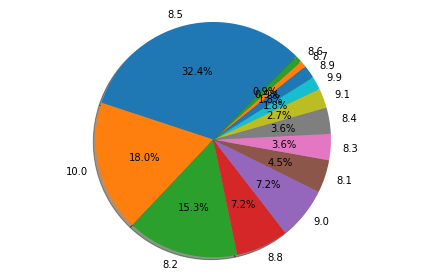

In [118]:
# Pie chart Cacao%
labels = []
sizes = []
explode = []
labels = choco_bar4['Cocoa Percent'].value_counts().index
for index, size in enumerate(choco_bar4['Cocoa Percent'].value_counts()):
    sizes.append(size)
    if labels[index]=='Percent high':
        explode.append(0.2)
    else: # add high Percent too?
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

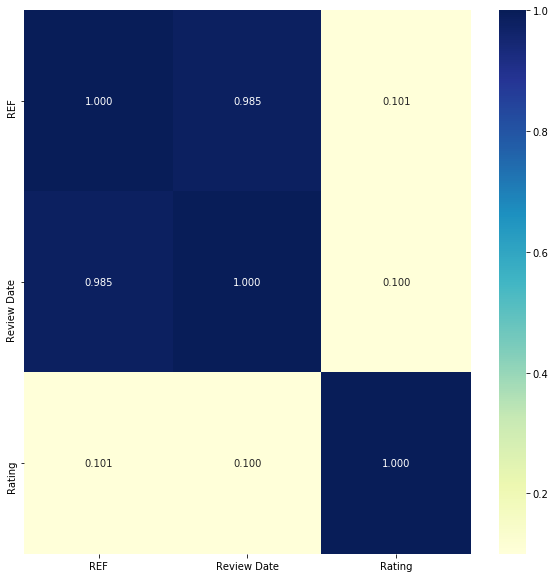

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(choco_bar.corr(), annot=True, fmt='.3f', cmap='YlGnBu')

In [0]:
choco_bar.groupby('Rating').sum()

,REF,Review Date
Rating,,
1.00,576,8028
1.50,4624,20092
1.75,1962,6032
2.00,13075,64277
2.25,16511,28184
2.50,123867,255534
2.75,281946,521276
3.00,307245,685953
3.25,360628,609993


In [0]:
# google Gpread


In [0]:
def check_exists(path):
# open the file. If exist return True
# Your code here
  try:
    sh=gc.open(path)
    return True
  except:
    return False

In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
#     sh.del_worksheet(sh.sheet1)
#     return sh


In [0]:
sheets = {
    # Sheet name: column in this sheet
    'Chocolate_bar123': choco_bar.columns.values.tolist()
}

In [0]:
sheets

{'Chocolate_bar': ['Company',
  'Origin Bar Name',
  'REF',
  'Review Date',
  'Cocoa Percent',
  'Company Location',
  'Rating',
  'Bean Type',
  'Bean Origin']}

In [0]:
choco = create_new_worksheet('Chocolate_bar123',sheets)

create_new_worksheet(): File exists


In [0]:
# Push dataframe to google spreadsheet
choco.values_update(
     'Chocolate_bar123!A2',
    params={'valueInputOption': 'RAW'},
    body={'values':choco_bar.fillna('').values.tolist()}
    
    
    
    
)

{'spreadsheetId': '1GL5RsMm3eHYBYpHxT0yA8HG1GoXj1Qj8GoG7oQ-70JA',
 'updatedCells': 16155,
 'updatedColumns': 9,
 'updatedRange': 'Chocolate_bar123!A2:I1796',
 'updatedRows': 1795}

In [0]:
#  Get google spreadsheet data as dataframe
df = pd.DataFrame(choco.sheet1.get_all_records()) 

In [0]:
df.head()

,Bean Origin,Bean Type,Cocoa Percent,Company,Company Location,Origin Bar Name,REF,Rating,Review Date
0,Sao Tome,,63%,A. Morin,France,Agua Grande,1876,3.75,2016
1,Togo,,70%,A. Morin,France,Kpime,1676,2.75,2015
2,Togo,,70%,A. Morin,France,Atsane,1676,3.00,2015
3,Togo,,70%,A. Morin,France,Akata,1680,3.50,2015
4,Peru,,70%,A. Morin,France,Quilla,1704,3.50,2015
